# Tests CL18

<IPython.core.display.Javascript object>


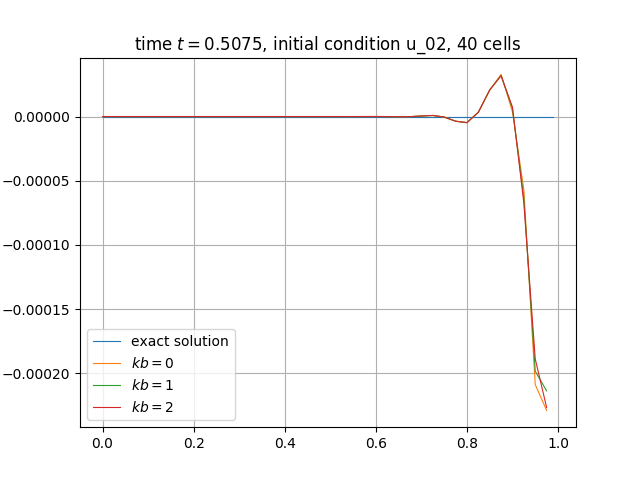

In [3]:
%matplotlib notebook

import numpy as np
import scipy.special as special
import scipy.integrate as integrate
import matplotlib.pyplot as plt

a = 1.
g = 0. #dirichlet at left

def u_01(x):
    if x-0.5 > 0:
        return((x-0.5)**3)
    else:
        return(0.)
        
def u_02(x):
    if x-0.5 > 0:
        return((x-0.5)**2.6)
    else:
        return(0.)
        
def u_03(x):
    if x-0.5 > 0:
        return((x-0.5)**2.5)
    else:
        return(0.)
        
#next, mu stands for lambda in cl18

def lw(mu): #lax wendroff
    return([((a**2)*(mu**2)+a*mu)/2,1-(a**2)*(mu**2),((a**2)*(mu**2)-a*mu)/2])
        
def cl(u0,g,t,J,r,p,mu,kb,scheme):

    b = scheme(mu) #b represents coefficients a_l in cl18, numbered in python here, ie from index 0
    dx, N = 1/J, int(t*J/mu)
    u = np.zeros(J+r+p) #u numbered in python here, ie from index 0
    
    for j in range(J):
        u[r+j] = u0((j+0.5)*dx)
        #u[r+j] = (1/dx)*integrate.quad(u0,(j-1)*dx,j*dx)[0]
        
    for n in range(N): #check
        for l in range(r):
            u[r-l] = g
        u[r+J:r+J+p] = sum([special.binom(kb,k)*((-1)**(k+1))*u[r+J-k:r+J+p-k] for k in range(1,kb+1)])
        u[r:r+J] = sum([b[r+l]*u[r+l:r+J+l] for l in range(-r,p+1)])
        #here the interior values of u are at step n+1 whereas the extreme values are at step n
        
    return(u[r:r+J])
    
def sol_plot(u_0,t,J): # check arange
    X = np.arange(0,1,1e-2)
    plt.clf()
    plt.plot(X,[u_0(j*1e-2-t) for j in range(100)],linewidth = .8,label = 'exact solution') 
    
    for kb in range(3):
        plt.plot(np.arange(0,1,1/J),cl(u_02,g,t,J,1,1,0.7,kb,lw),linewidth = .8,label = '$kb =$'+str(kb))
    
    plt.grid()
    plt.title(f'time $t = {t}$, initial condition {u_0.__name__}, {J} cells')
    plt.legend()
    plt.show()

J = 40
#t = 0.2625
t = 0.5075
sol_plot(u_02,t,J)